In [4]:
# http://pandas.pydata.org/pandas-docs/stable/10min.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Object Creation

In [2]:
#Creating a Series by passing a list of values, letting pandas create a default integer index:
s = pd.Series([1,3,5,np.nan,6,8])
s

In [5]:
# Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns
dates = pd.date_range('20130101', periods=6)
print dates

df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


,A,B,C,D
2013-01-01,0.150101,0.824143,-0.370009,0.344611
2013-01-02,-2.905124,-0.994531,-0.952684,0.818369
2013-01-03,0.162846,0.175144,-0.586968,0.162727
2013-01-04,0.572531,-0.623869,-0.644260,0.006439
2013-01-05,-1.159252,0.632779,0.204952,0.640783
2013-01-06,0.894445,-0.467238,0.676319,-0.367172


In [19]:
# Creating a DataFrame by passing a dict of objects that can be converted to series-like.
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' }) 
print df2.dtypes
df2

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


## Viewing Data

In [23]:
df.head(2)

,A,B,C,D
2013-01-01,0.861214,-0.693141,1.195875,2.246048
2013-01-02,-0.839801,-1.412150,1.107317,0.279261


In [24]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.379741,-0.207151,-0.965277,-0.811105
2013-01-05,-0.981580,-0.170005,0.599443,-0.799112
2013-01-06,1.755589,1.212353,-1.203404,-0.158116


In [33]:
print df.index
print df.columns
print df.values

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
Index([u'A', u'B', u'C', u'D'], dtype='object')
[[ 0.86121393 -0.69314124  1.19587522  2.2460481 ]
 [-0.83980094 -1.41214971  1.10731735  0.27926111]
 [ 1.08467045  0.78030178 -0.30668821  0.07370536]
 [-0.37974139 -0.2071513  -0.96527716 -0.81110538]
 [-0.98158021 -0.17000472  0.59944346 -0.79911167]
 [ 1.75558942  1.21235333 -1.20340393 -0.15811609]]


In [31]:
# Describe shows a quick statistic summary of your data
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.250059,-0.081632,0.071211,0.138447
std,1.134732,0.957613,1.044909,1.125577
min,-0.981580,-1.412150,-1.203404,-0.811105
25%,-0.724786,-0.571644,-0.800630,-0.638863
50%,0.240736,-0.188578,0.146378,-0.042205
75%,1.028806,0.542725,0.980349,0.227872
max,1.755589,1.212353,1.195875,2.246048


In [34]:
# transpose
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.861214,-0.839801,1.084670,-0.379741,-0.981580,1.755589
B,-0.693141,-1.412150,0.780302,-0.207151,-0.170005,1.212353
C,1.195875,1.107317,-0.306688,-0.965277,0.599443,-1.203404
D,2.246048,0.279261,0.073705,-0.811105,-0.799112,-0.158116


In [42]:
# Sorting by an axis, here D,C,B,A
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,2.246048,1.195875,-0.693141,0.861214
2013-01-02,0.279261,1.107317,-1.412150,-0.839801
2013-01-03,0.073705,-0.306688,0.780302,1.084670
2013-01-04,-0.811105,-0.965277,-0.207151,-0.379741
2013-01-05,-0.799112,0.599443,-0.170005,-0.981580
2013-01-06,-0.158116,-1.203404,1.212353,1.755589


In [46]:
# Sorting by value
df.sort_values(by='B', ascending=False)

,A,B,C,D
2013-01-06,1.755589,1.212353,-1.203404,-0.158116
2013-01-03,1.084670,0.780302,-0.306688,0.073705
2013-01-05,-0.981580,-0.170005,0.599443,-0.799112
2013-01-04,-0.379741,-0.207151,-0.965277,-0.811105
2013-01-01,0.861214,-0.693141,1.195875,2.246048
2013-01-02,-0.839801,-1.412150,1.107317,0.279261


## Selection

In [6]:
# Selecting a single column
df['A']

2013-01-01    0.150101
2013-01-02   -2.905124
2013-01-03    0.162846
2013-01-04    0.572531
2013-01-05   -1.159252
2013-01-06    0.894445
Freq: D, Name: A, dtype: float64

In [50]:
#  slices the rows.
df[0:3]

,A,B,C,D
2013-01-01,0.861214,-0.693141,1.195875,2.246048
2013-01-02,-0.839801,-1.412150,1.107317,0.279261
2013-01-03,1.084670,0.780302,-0.306688,0.073705


In [59]:
# selection by label.
df.loc[dates[2]]

A    1.084670
B    0.780302
C   -0.306688
D    0.073705
Name: 2013-01-03 00:00:00, dtype: float64

In [56]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.861214,-0.693141
2013-01-02,-0.839801,-1.412150
2013-01-03,1.084670,0.780302
2013-01-04,-0.379741,-0.207151
2013-01-05,-0.981580,-0.170005
2013-01-06,1.755589,1.212353


In [60]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.839801,-1.412150
2013-01-03,1.084670,0.780302
2013-01-04,-0.379741,-0.207151


In [63]:
# For getting a scalar value
df.loc[dates[0],'A']
# or
df.at[dates[0],'A']

0.86121392946335884

In [74]:
# Selection by Position
print df.iloc[3]
print df.iloc[3:5, 0:2]
print df.iloc[[1,2,4],[0,2]]

A   -0.379741
B   -0.207151
C   -0.965277
D   -0.811105
Name: 2013-01-04 00:00:00, dtype: float64
                   A         B
2013-01-04 -0.379741 -0.207151
2013-01-05 -0.981580 -0.170005
                   A         C
2013-01-02 -0.839801  1.107317
2013-01-03  1.084670 -0.306688
2013-01-05 -0.981580  0.599443


In [77]:
# getting a value explicitly
assert df.iat[1,1] == df.iloc[1,1]

In [8]:
#Boolean Indexing
df[df.A >0]

,A,B,C,D
2013-01-01,0.150101,0.824143,-0.370009,0.344611
2013-01-03,0.162846,0.175144,-0.586968,0.162727
2013-01-04,0.572531,-0.623869,-0.644260,0.006439
2013-01-06,0.894445,-0.467238,0.676319,-0.367172


In [10]:
# find by column value
df[df.A == 0.150101]

,A,B,C,D


In [84]:
# filter by isin
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']

df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,1.08467,0.780302,-0.306688,0.073705,two
2013-01-05,-0.98158,-0.170005,0.599443,-0.799112,four


## Setting

In [91]:
# Setting a new column automatically aligns the data by the indexes
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130103', periods=6))
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,0.861214,-0.693141,1.195875,2.246048,NaN
2013-01-02,-0.839801,-1.412150,1.107317,0.279261,NaN
2013-01-03,1.084670,0.780302,-0.306688,0.073705,1.0
2013-01-04,-0.379741,-0.207151,-0.965277,-0.811105,2.0
2013-01-05,-0.981580,-0.170005,0.599443,-0.799112,3.0
2013-01-06,1.755589,1.212353,-1.203404,-0.158116,4.0


In [106]:
df.at[dates[0],'A'] = 0
df.iat[0,1] = 0
df.loc[:3,'D'] = np.array([5] * 3)
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.195875,5,NaN
2013-01-02,-0.839801,-1.412150,1.107317,5,NaN
2013-01-03,1.084670,0.780302,-0.306688,5,1.0
2013-01-04,-0.379741,-0.207151,-0.965277,5,2.0
2013-01-05,-0.981580,-0.170005,0.599443,5,3.0
2013-01-06,1.755589,1.212353,-1.203404,5,4.0


In [107]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.195875,-5,NaN
2013-01-02,-0.839801,-1.412150,-1.107317,-5,NaN
2013-01-03,-1.084670,-0.780302,-0.306688,-5,-1.0
2013-01-04,-0.379741,-0.207151,-0.965277,-5,-2.0
2013-01-05,-0.981580,-0.170005,-0.599443,-5,-3.0
2013-01-06,-1.755589,-1.212353,-1.203404,-5,-4.0


## Missing Data

In [111]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.195875,5,NaN,1.0
2013-01-02,-0.839801,-1.412150,1.107317,5,NaN,1.0
2013-01-03,1.084670,0.780302,-0.306688,5,1.0,NaN
2013-01-04,-0.379741,-0.207151,-0.965277,5,2.0,NaN


In [115]:
# To drop any rows that have missing data.
df2.dropna(how='any')

,A,B,C,D,F
2013-01-03,-1.084670,-0.780302,-0.306688,-5,-1.0
2013-01-04,-0.379741,-0.207151,-0.965277,-5,-2.0
2013-01-05,-0.981580,-0.170005,-0.599443,-5,-3.0
2013-01-06,-1.755589,-1.212353,-1.203404,-5,-4.0


In [113]:
# Filling missing data
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.195875,5,5.0,1.0
2013-01-02,-0.839801,-1.412150,1.107317,5,5.0,1.0
2013-01-03,1.084670,0.780302,-0.306688,5,1.0,5.0
2013-01-04,-0.379741,-0.207151,-0.965277,5,2.0,5.0


In [117]:
# To get the boolean mask where values are nan
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,True,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

A     5.125294
B     6.365422
C   -18.344897
D    17.157287
dtype: float64
6.36542201132


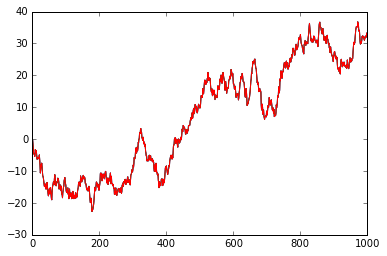

In [302]:
# stats
print df.mean()
#print df.mean(1)
print df['B'].mean()
df['B'].plot()
plt.show()

In [126]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.084670,-0.219698,-1.306688,4.0,0.0
2013-01-04,-3.379741,-3.207151,-3.965277,2.0,-1.0
2013-01-05,-5.981580,-5.170005,-4.400557,0.0,-2.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [133]:
# Apply
df.apply(np.cumsum)   # columnwise

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.195875,5,NaN
2013-01-02,-0.839801,-1.412150,2.303193,10,NaN
2013-01-03,0.244870,-0.631848,1.996504,15,1.0
2013-01-04,-0.134872,-0.838999,1.031227,20,3.0
2013-01-05,-1.116452,-1.009004,1.630671,25,6.0
2013-01-06,0.639137,0.203349,0.427267,30,10.0


In [131]:
df.apply(lambda x: x.max() - x.min())

A    2.737170
B    2.624503
C    2.399279
D    0.000000
F    3.000000
dtype: float64

In [137]:
# Histogramming
s = pd.Series(np.random.randint(0, 7, size=10))
print s
print s.value_counts()

0    5
1    1
2    2
3    2
4    5
5    5
6    3
7    2
8    4
9    2
dtype: int64
2    4
5    3
4    1
3    1
1    1
dtype: int64


In [139]:
# string methods
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge
* merge: rows
* join: columns

In [144]:
# concat
df = pd.DataFrame(np.random.randn(10, 4))
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.348362 -0.898624 -1.710939 -0.328878
 1  0.532052 -0.361674  0.126799 -1.295277
 2 -0.587133  1.423731  0.085933  1.012145,
           0         1         2         3
 3 -0.449279 -0.033033  1.033849  0.680367
 4  0.394525 -0.315327  0.517545  0.601405
 5  2.379779 -2.727385  0.212399  0.612010
 6 -1.358623 -0.245299 -1.464438 -1.358064,
           0         1         2         3
 7 -1.179000  0.671408  0.678150 -0.107254
 8  0.256308 -2.032945 -1.053037 -0.052113
 9 -0.282417  0.686332 -0.149664 -0.756485]

In [145]:
pd.concat(pieces)

,0,1,2,3
0,0.348362,-0.898624,-1.710939,-0.328878
1,0.532052,-0.361674,0.126799,-1.295277
2,-0.587133,1.423731,0.085933,1.012145
3,-0.449279,-0.033033,1.033849,0.680367
4,0.394525,-0.315327,0.517545,0.601405
5,2.379779,-2.727385,0.212399,0.612010
6,-1.358623,-0.245299,-1.464438,-1.358064
7,-1.179000,0.671408,0.678150,-0.107254
8,0.256308,-2.032945,-1.053037,-0.052113
9,-0.282417,0.686332,-0.149664,-0.756485


In [153]:
# join
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
left  

,key,lval
0,foo,1
1,bar,2


In [158]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [159]:
pd.merge(left, right, on='key')  

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [164]:
# append
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
s = df.iloc[3]

df.append(s, ignore_index=True)

,A,B,C,D
0,-0.552841,0.158840,1.011807,-1.025820
1,0.592009,1.320044,2.864009,-3.018242
2,0.310237,0.660296,-0.235651,1.378061
3,0.270085,1.360945,-0.890560,-0.619104
4,1.558842,0.746849,1.400180,1.305665
5,-1.149317,-0.566202,0.015116,0.750837
6,1.322027,-0.091397,1.141188,-0.690978
7,0.792033,-0.171342,-0.280858,0.370086
8,0.270085,1.360945,-0.890560,-0.619104


## Grouping
By “group by” we are referring to a process involving one or more of the following steps
* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure

In [170]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)}) 

df.groupby('A').sum()

,A,B,C,D
0,foo,one,-0.082847,-0.908853
1,bar,one,-1.050038,-0.239541
2,foo,two,-1.321688,-0.496367
3,bar,three,-0.276713,0.816267
4,foo,two,0.047237,0.447822
5,bar,two,0.917974,0.219799
6,foo,one,0.027283,0.801979
7,foo,three,0.197282,0.100893


In [177]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.050038 -0.239541
    three -0.276713  0.816267
    two    0.917974  0.219799
foo one   -0.055564 -0.106874
    three  0.197282  0.100893
    two   -1.274452 -0.048545

## Reshaping

In [179]:
# stack
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]  # first 4 rows
df2

A         B
first second                    
bar   one    -0.018851 -0.624930
      two    -0.451629  1.257529
baz   one    -0.860397  1.725100
      two     0.798441 -1.855692

In [185]:
# The stack() method “compresses” a level in the DataFrame’s columns.
stacked = df2.stack() # A,B -> one column
stacked

first  second   
bar    one     A   -0.018851
               B   -0.624930
       two     A   -0.451629
               B    1.257529
baz    one     A   -0.860397
               B    1.725100
       two     A    0.798441
               B   -1.855692
dtype: float64

In [186]:
stacked.unstack()  # last column

A         B
first second                    
bar   one    -0.018851 -0.624930
      two    -0.451629  1.257529
baz   one    -0.860397  1.725100
      two     0.798441 -1.855692

In [190]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.018851 -0.860397
       B -0.624930  1.725100
two    A -0.451629  0.798441
       B  1.257529 -1.855692

In [191]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.018851 -0.451629
      B -0.624930  1.257529
baz   A -0.860397  0.798441
      B  1.725100 -1.855692

# pivot
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                  'B' : ['A', 'B', 'C'] * 4,
                  'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                  'D' : np.random.randn(12),
                  'E' : np.random.randn(12)})
df

In [194]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -1.447895  0.127868
      B  0.598178  0.289695
      C -1.555920 -1.068118
three A -2.116469       NaN
      B       NaN -0.438724
      C -0.344130       NaN
two   A       NaN -1.079046
      B  0.951974       NaN
      C       NaN  0.449472

## Time Series

In [205]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
# converting secondly data into 5-minutely data
ts.resample('5Min').mean()

2012-01-01    247.46
Freq: 5T, dtype: float64

In [212]:
#Time zone representation
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
print 'ts:\n', ts
ts_utc = ts.tz_localize('UTC')
print 'ts_utc:\n', ts_utc

ts:
2012-03-06   -1.785610
2012-03-07   -0.347675
2012-03-08   -1.135894
2012-03-09    0.555305
2012-03-10   -0.056127
Freq: D, dtype: float64
ts_utc:
2012-03-06 00:00:00+00:00   -1.785610
2012-03-07 00:00:00+00:00   -0.347675
2012-03-08 00:00:00+00:00   -1.135894
2012-03-09 00:00:00+00:00    0.555305
2012-03-10 00:00:00+00:00   -0.056127
Freq: D, dtype: float64


In [219]:
#Convert to another time zone
print ts_utc.tz_convert('Asia/Shanghai')

2012-03-06 08:00:00+08:00   -1.785610
2012-03-07 08:00:00+08:00   -0.347675
2012-03-08 08:00:00+08:00   -1.135894
2012-03-09 08:00:00+08:00    0.555305
2012-03-10 08:00:00+08:00   -0.056127
Freq: D, dtype: float64


In [225]:
# Converting between time span representations
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ps = ts.to_period()
ps.to_timestamp()

2012-01-01    0.028386
2012-02-01   -2.365536
2012-03-01   -1.964535
2012-04-01   -1.120545
2012-05-01    2.002849
Freq: MS, dtype: float64

## Categoricals

In [226]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

In [232]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [235]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

In [236]:
df.sort_values(by="grade")

,id,raw_grade,grade
0,1,a,very good
3,4,a,very good
4,5,a,very good
1,2,b,good
2,3,b,good
5,6,e,very bad


In [237]:
df.groupby("grade").size()

grade
very good    3
good         2
very bad     1
dtype: int64

## Plotting

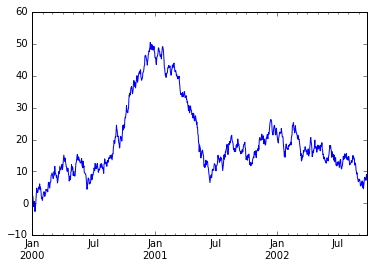

In [272]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()  # cumulative sum
ts.plot()
plt.show()

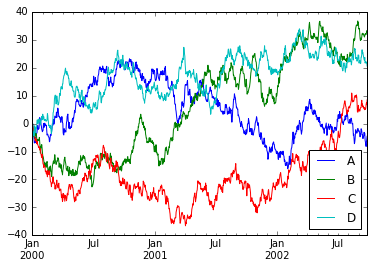

In [284]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
             columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); 
df.plot(); plt.legend(loc='best')
plt.show()

## Getting Data In/Out

In [286]:
#csv
df.to_csv('foo.csv')
df = pd.read_csv('foo.csv')

In [ ]:
# excel
df.to_excel('foo.xlsx', sheet_name='Sheet1')
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

In [293]:
from scipy import stats
stats.ttest_ind?

(500,)